In [5]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


# Overview

- Test cases comparing 

# Hermes IO

In [6]:
casestore = dict()

In [7]:
   
db = CaseDB()
toload = [
    dict(name="chained", id = "xafn1b-chained_120"),
    dict(name="unchained", id = "xafn2b-unchained_120"),
]
casestore = {}
for case in toload:
    casestore[case["name"]] = db.load_case_2D(case["id"], use_squash = True, verbose = True)

- Looking for squash file
- Squash file found. squash date 10/04/2023, 15:02:02, dmp file date 10/04/2023, 00:38:56
CHECK: Total domain volume is 1.942E+00 [m3]
- Looking for squash file
- Squash file found. squash date 10/04/2023, 15:03:45, dmp file date 10/04/2023, 00:39:26
CHECK: Total domain volume is 1.942E+00 [m3]


In [5]:
plt.close("all")
%matplotlib inline

## Read Hermes data

In [6]:
hr = dict()
for hermes_case in casestore.keys(): 
    print(hermes_case)
    hr[hermes_case] = Hermesdata()
    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

chained
unchained


# Read SOLEDGE CSV data

In [69]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

## Read SOLPS

In [ ]:
path = solpscases["16x_mc"]

read_last10s(where = path, save = True)

In [10]:
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    sp[name].read_last10s(solpscases[name])

c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\co

In [11]:
for name in casestore:

    ds = casestore[name].ds
    ds = calculate_radial_fluxes(ds)



# Runtime

Text(0.5, 1.0, 'Simulation speed')

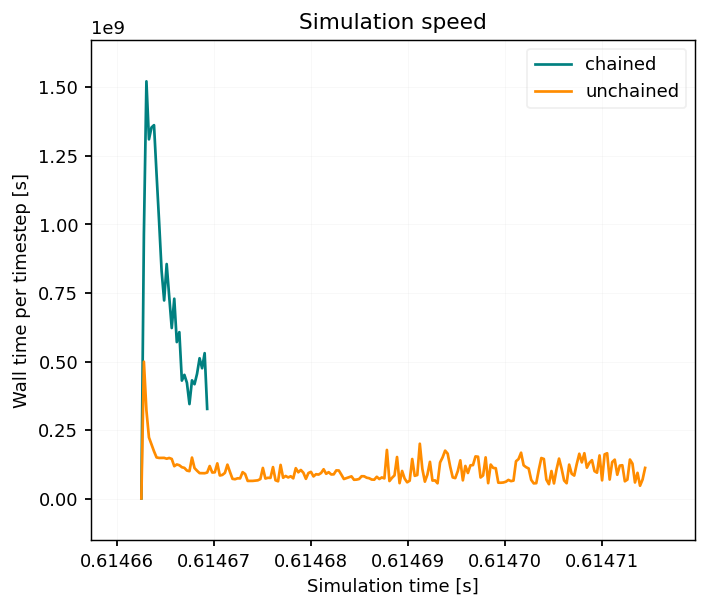

In [8]:
fig, ax = plt.subplots(dpi = 130)

for case in casestore:
    if case == "rnn_1.6":
        continue
    ds = casestore[case].ds
    wtime = ds["wtime"][:-1].values
    tstep = ds["t"].diff("t").values
    
    wtime_per_tstep = wtime/tstep
    time = ds["t"][:-1].values

    
    ax.plot(time, wtime_per_tstep, label = case)
    
ax.legend()
ax.set_xlabel("Simulation time [s]")
ax.set_ylabel("Wall time per timestep [s]")
ax.set_title("Simulation speed")

In [35]:
sp.keys()

dict_keys(['base', 'noiz_core', 'gammai_2.5', 'dpuff_1e22', 'dpuff_5e21', 'no_fast_reflec', 'nsep_2e19', 'nsep_3e19', 'narrow_core', 'no_visc', '16x_mc'])

In [42]:
parse_solps("Ne", "outer_lower")

'ne3dr'

#  Neutral energy transport

In [9]:
for case in casestore:
    casestore[case].ds = calculate_radial_fluxes(casestore[case].ds)
    casestore[case].ds = reverse_pfr_fluxes(casestore[case].ds)

# Integrals

In [12]:
casestore.keys()

dict_keys(['chained', 'unchained'])

## OMP

KeyError: 'hf_perp_diff_L_d'

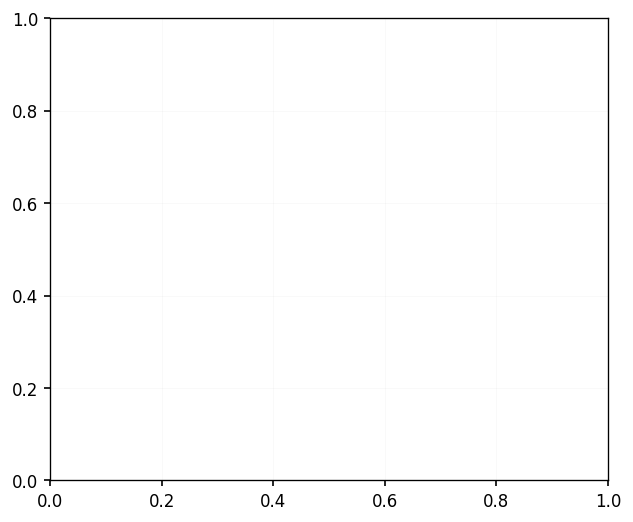

In [22]:
fig, ax = plt.subplots()
ds = casestore["chained"].ds.isel(t=3)

neutrals_only = True
loc = "omp"

if ds.coords["t"].shape != ():
    raise Exception("Must supply single time slice")

if ax == None:
    fig, ax = plt.subplots()

if loc == "integral":
    d = ds.isel(x=slice(2,-2)).sum("theta")
    print("Integrating poloidally")
    ylabel = "Radial heat flow $[MW]$"
    title = "Whole domain radial heat flow integral"
    scale = 1e-6
elif loc == "omp":
    d = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    ylabel = "Radial heat flux $[Wm^{-2}]$"
    title = "Radial heat fluxes at OMP"
    scale = 1
elif loc == "imp":    
    d = ds.hermesm.select_region("inner_midplane_a").isel(x=slice(2,-2))
    ylabel = "Radial heat flux $[Wm^{-2}]$"
    title = "Radial heat fluxes at IMP"
    scale = 1
else:
    raise Exception("Location must be omp, imp or integral")


    
omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
dist = np.insert(dist.values, 0, dist.values[0] - (dist.values[1] - dist.values[0]))

def append_rhs(x):
    F = d[x].values
    rhs = d[x.replace("_L_", "_R_")][-1].values
    return np.concatenate([F, [rhs]])

m = "o"
ms = 0

if neutrals_only is False:
    ax.plot(dist, append_rhs("hf_perp_diff_L_e")*scale, label = "Electron total", marker = m, ms = 0, c = "teal")
    ax.plot(dist, append_rhs("hf_perp_diff_L_d+")*scale, label = "Ion conduction", marker = m, ms = ms, ls = "--", c = "red")
    ax.plot(dist, append_rhs("hf_perp_conv_L_d+")*scale, label = "Ion convection", marker = "x",ls = ":", ms = ms, c = "red")
    ax.plot(dist, append_rhs("hf_perp_tot_L_d+")*scale, label = "Ion total", marker = "|",ls = "-", ms = 0, c = "red")

ax.plot(dist, append_rhs("hf_perp_diff_L_d")*scale, label = "Neutral conduction", marker = m, ls = "--", ms = ms, c = "dimgray")
ax.plot(dist, append_rhs("hf_perp_conv_L_d")*scale, label = "Neutral convection", marker = "x",ls = ":", ms = ms, c = "dimgray")
ax.plot(dist, append_rhs("hf_perp_tot_L_d")*scale, label = "Neutral total", marker = "|",ls = "-", ms = ms, c = "dimgray")

leg = ax.legend(loc = "upper right", bbox_to_anchor = (1,1), fontsize = 10)

for line in leg.get_lines():
    line.set_linewidth(2.0)

ax.set_ylabel(ylabel)
ax.set_xlabel("Distance from separatrix [m]")
ax.set_title(title)
# ax.set_ylim(ylim)

ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: old", color = "grey", lw=0, marker = "o", ms = 3, alpha = 0.3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: new", color = "red", lw=0, marker = "v", ms = 3)
# ax2 = ax.twinx()
# ax2.plot(dist, np.insert(d["heat_flux_factor_d"].values,-1,1), label = "flux limit factor")

ax.legend()
ax.grid(alpha = 1)

In [16]:
ds.data_vars

Data variables:
    Bxy                            (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Dnnd                           (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_iz                         (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_rec                        (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed_pump                        (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed_target_recycle              (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed_target_refl                 (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed_wall_recycle                (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed_wall_refl                   (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Edd+_cx                        (x, theta) float64 das

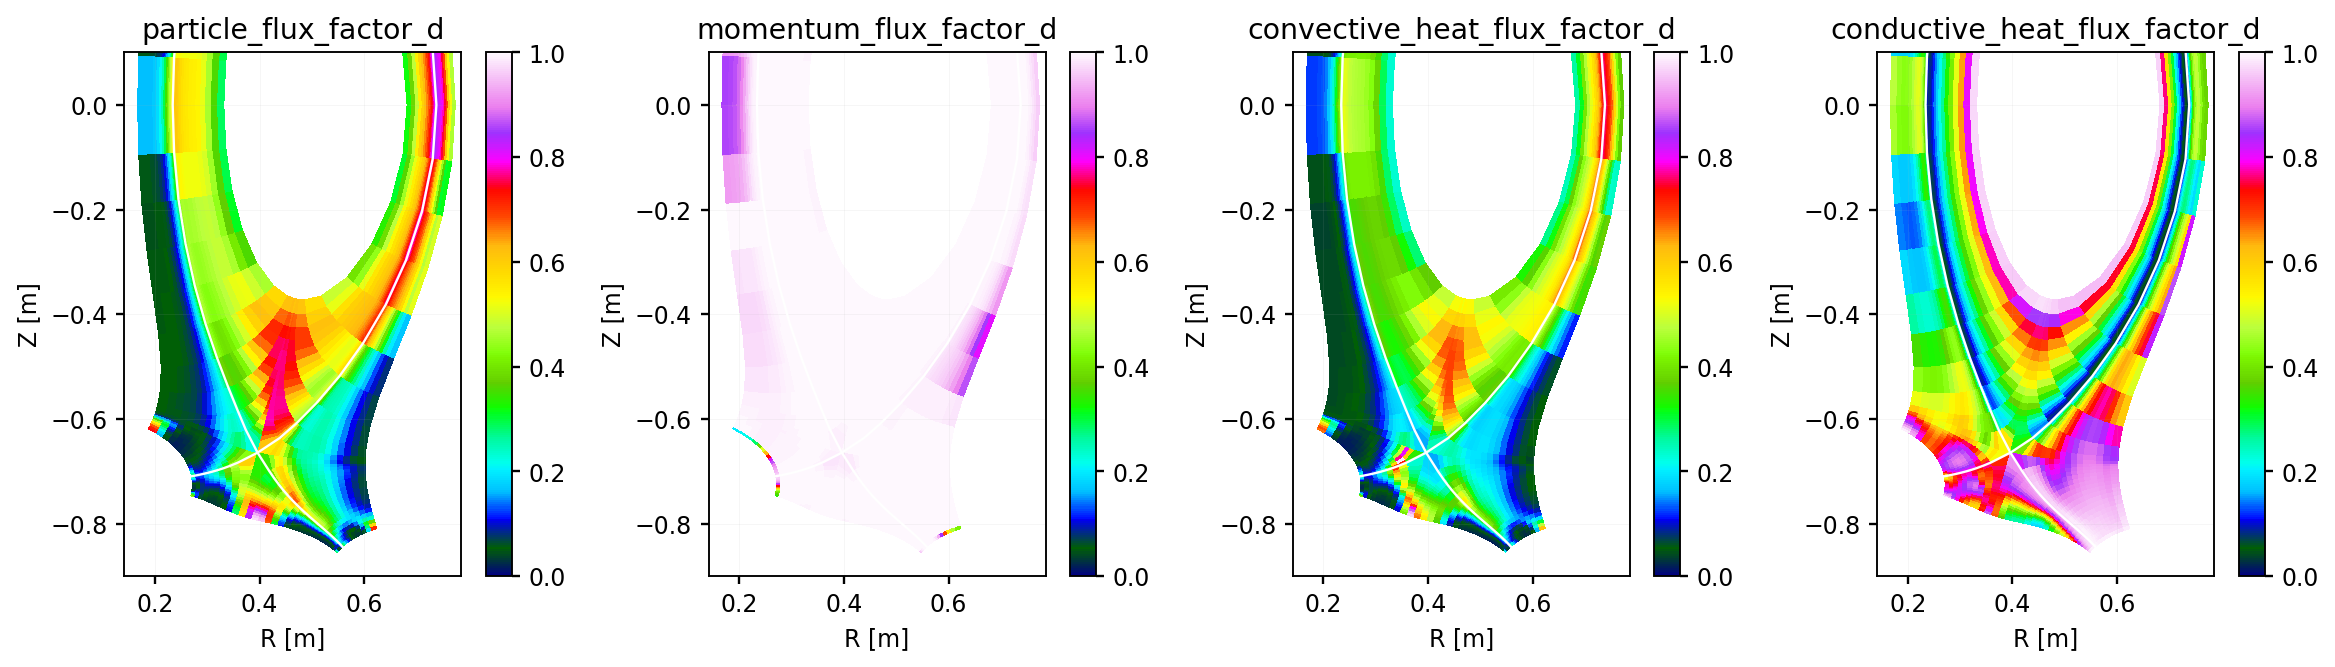

In [21]:
ds = casestore["unchained"].ds.isel(t=-1)

fig, axes = plt.subplots(1,4, figsize=(17,4), dpi = 170)
ds["particle_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["momentum_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["convective_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["conductive_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "gist_ncar", vmin = 0, vmax = 1)

for ax in axes:
    ax.set_ylim(-0.9,0.1)

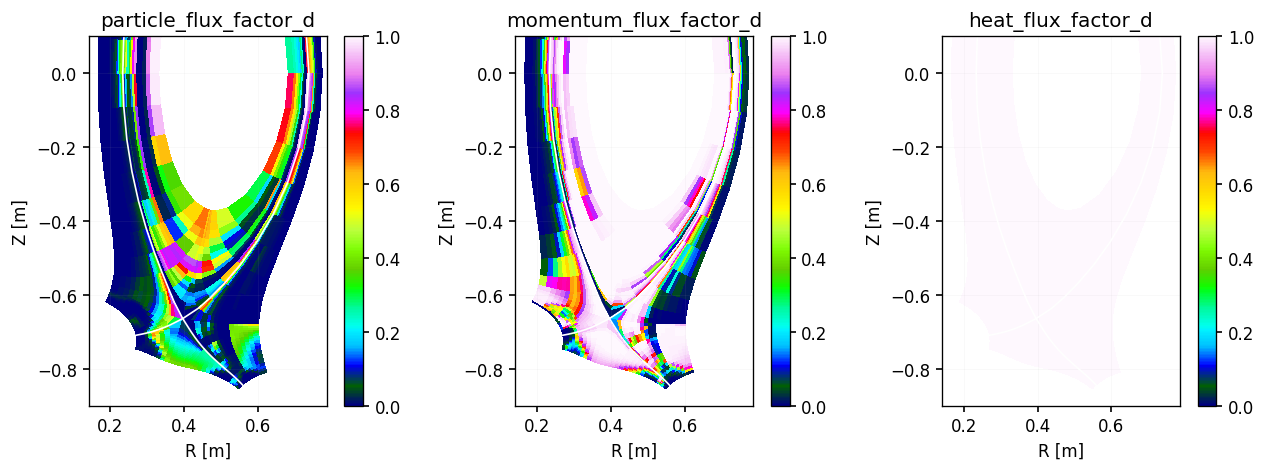

In [20]:
ds = casestore["chained"].ds.isel(t=-1)

fig, axes = plt.subplots(1,3, figsize=(13,4))
ds["particle_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["momentum_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", vmin = 0, vmax = 1)

for ax in axes:
    ax.set_ylim(-0.9,0.1)

In [55]:
d["heat_flux_factor_d"].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [51]:
np.insert(d["heat_flux_factor_d"].values,0,0)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## Looking at the fluxes across domain

In [28]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

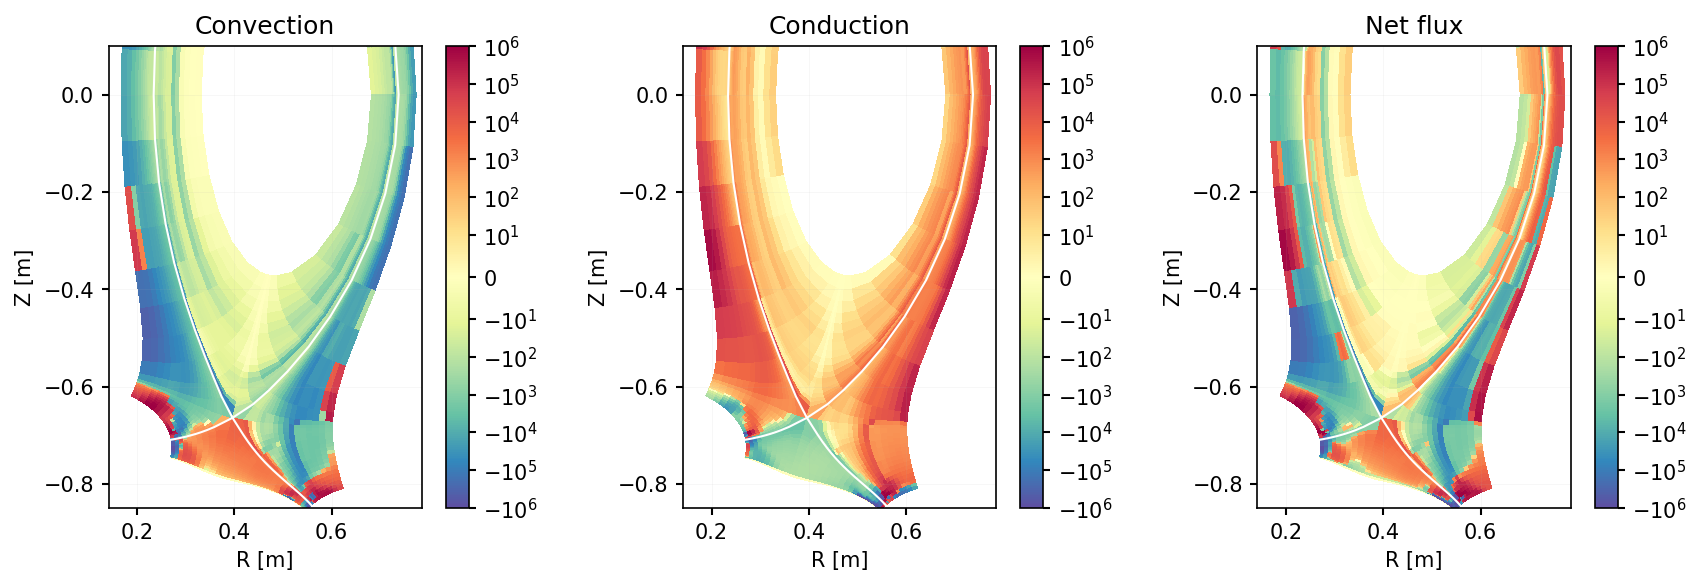

In [18]:
ds = casestore["chained"].ds.isel(t = -1)

fig, axes = plt.subplots(1,3, figsize = (14, 4), dpi = 150)

net_flux = ds["hf_perp_conv_L_d"] + ds["hf_perp_diff_L_d"]


ds["hf_perp_conv_L_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[0].set_title("Convection")

ds["hf_perp_diff_L_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[1].set_title("Conduction")

net_flux.hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[2].set_title("Net flux")

for ax in axes:
    ax.set_ylim(-0.85, 0.1)

In [ ]:
# Total energy flux 

In [55]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

# Total energy flux

Text(0.5, 1.0, '')

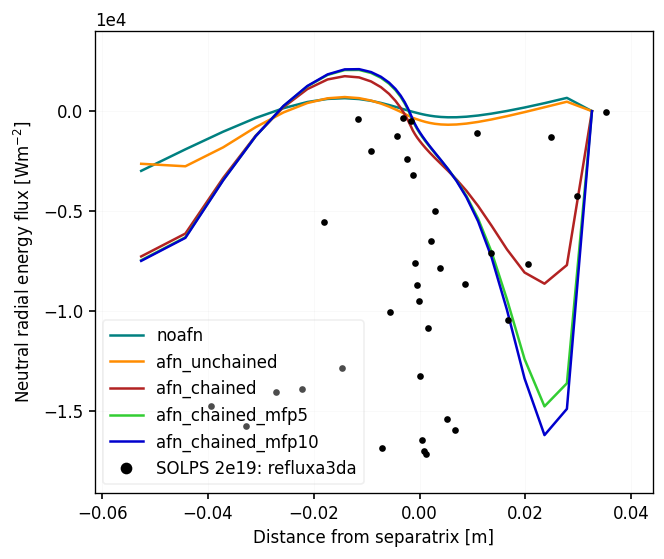

In [59]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")


fig, ax = plt.subplots()
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']

for i, case in enumerate(casestore):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = case)


ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: refluxa3da", color = "black", lw=0, marker = "o", ms = 3)
ax.set_ylabel("Neutral radial energy flux $[Wm^{-2}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()

ax.set_title("")

# PARTICLE FLUX

In [51]:
sp.keys()

dict_keys(['base', 'noiz_core', 'gammai_2.5', 'dpuff_1e22', 'dpuff_5e21', 'no_fast_reflec', 'nsep_2e19', 'nsep_3e19', 'narrow_core', 'no_visc', '16x_mc'])

In [97]:
for case in casestore:
    casestore[case].ds = calculate_radial_fluxes(casestore[case].ds)
    casestore[case].ds = reverse_pfr_fluxes(casestore[case].ds)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


Text(0.5, 1.0, '')

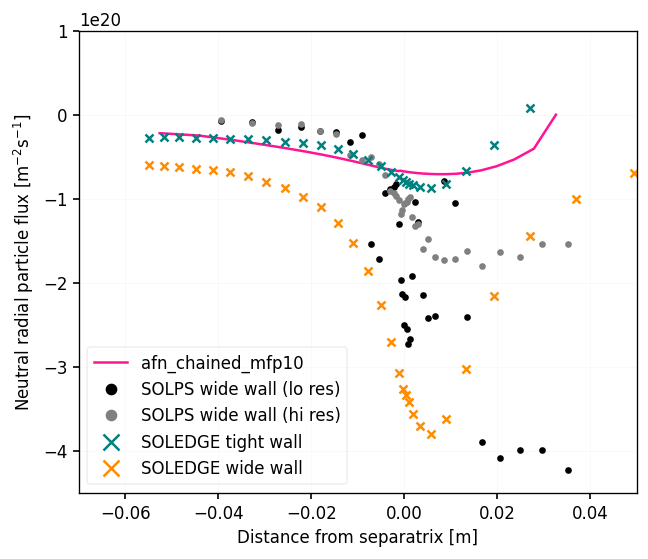

In [98]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")



fig, ax = plt.subplots()
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']

for i, case in enumerate(["afn_chained_mfp10"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = case, color = "deeppink")

# ax2 = ax.twinx()
# ax2.plot(dist, omp["particle_flux_factor_d"])

# SOLPS
ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (lo res)", color = "black", lw=0, marker = "o", ms = 3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (hi res)", color = "grey", lw=0, marker = "o", ms = 3)

# SOLEDGE
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
df = slc.get_1d_radial_data(["vxni", "Nni"])
df["NVxn"] = df["vxni"] * df["Nni"]
ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE tight wall", c = "teal")

slc = SOLEDGEcase(path = soledgecases["widewall_2e19"])
df = slc.get_1d_radial_data(["vxni", "Nni"])
df["NVxn"] = df["vxni"] * df["Nni"]
ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE wide wall", c = "darkorange")

ax.set_ylabel("Neutral radial particle flux $[m^{-2}s^{-1}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()
ax.set_xlim(-0.07, 0.05)
ax.set_ylim(-4.5e20, 1e20)
ax.set_title("")

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


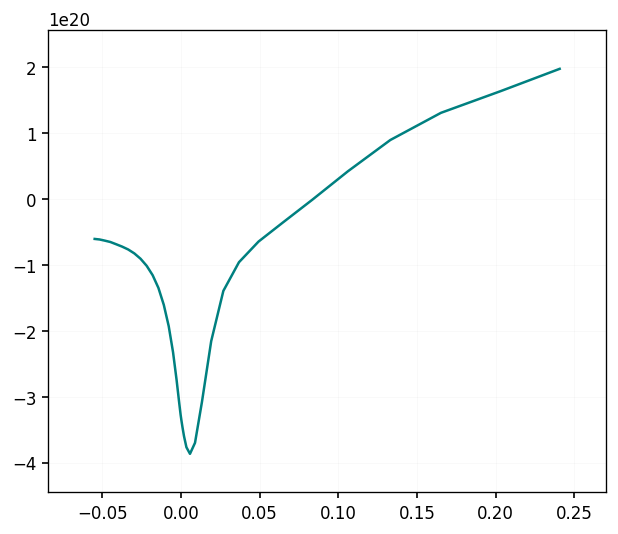

In [68]:
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19_5m"])

df = slc.get_1d_radial_data(["vxni", "Nni"])

df["NVxn"] = df["vxni"] * df["Nni"]

plt.plot(df["dist"], df["NVxn"]) 


# Convective energy flux

Text(0.5, 1.0, '')

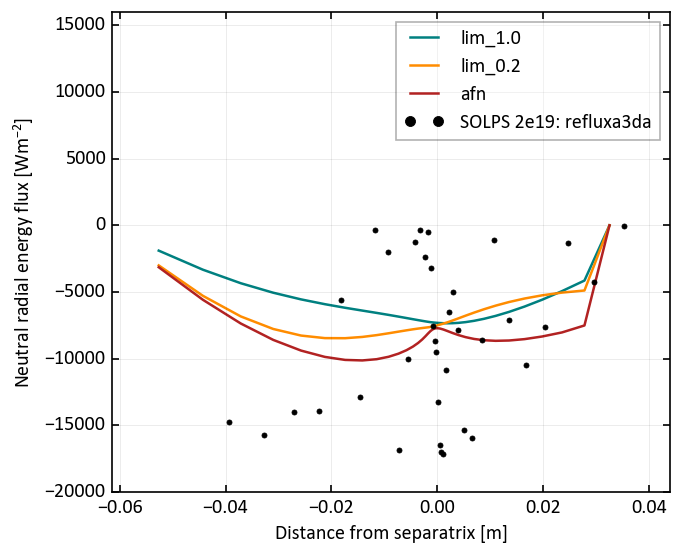

In [52]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")


fig, ax = plt.subplots()
labels = ["lim_1.0", "lim_0.2", "afn"]

for i, case in enumerate(["lim_1.0", "lim_0.2", "isolim"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["hf_perp_conv_R_d"] / (omp["dy"]*omp["dz"]), label = labels[i], ls = "-")


ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: refluxa3da", color = "black", lw=0, marker = "o", ms = 3,ls = "--")
ax.set_ylabel("Neutral radial energy flux $[Wm^{-2}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()
ax.set_ylim(-2e4, 16e3)
ax.set_title("")

Text(0.5, 1.0, 'AFN Limiter factors at OMP')

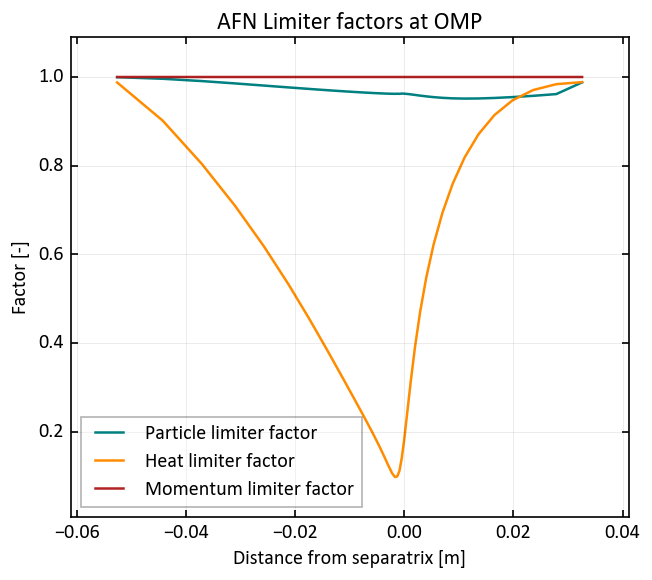

In [57]:
fig, ax = plt.subplots()

ds = casestore["isolim"].ds.isel(t=-1)
omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])

ax.plot(dist, omp["particle_flux_factor_d"], label = "Particle limiter factor")
ax.plot(dist, omp["heat_flux_factor_d"], label = "Heat limiter factor")
ax.plot(dist, omp["momentum_flux_factor_d"], label = "Momentum limiter factor")

ax.legend()
ax.set_xlabel("Distance from separatrix [m]")
ax.set_ylabel("Factor [-]")
ax.set_title("AFN Limiter factors at OMP")


Text(0.5, 1.0, '')

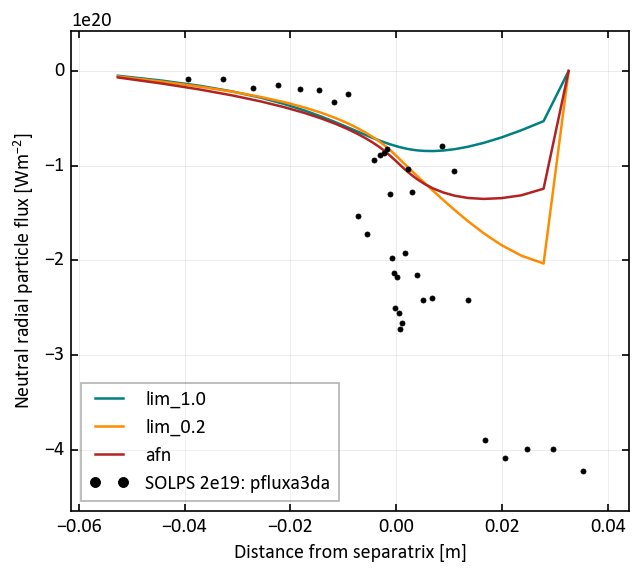

In [40]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")


fig, ax = plt.subplots()
labels = ["lim_1.0", "lim_0.2", "afn"]

for i, case in enumerate(["lim_1.0", "lim_0.2", "isolim"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = labels[i])


ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS 2e19: pfluxa3da", color = "black", lw=0, marker = "o", ms = 3,ls = "--")
ax.set_ylabel("Neutral radial particle flux $[Wm^{-2}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()

ax.set_title("")